## Learning Word Vectors with TensorFlow: Optimizer Selection
### Adam Optimizer
*Patrick Coady (pcoady@alum.mit.edu)*

This notebook explores (with Momentum optimizer):
1. Learning rates

I found the Adam optimizer to run very slow - perhaps 5x slower per epoch. I cut off this experiment at 20 epochs after seeing learning performance was also no better. I haven't heard of Adam being inherently slow, but I am not going to investigate further right now.

(The conditions are listed above each set of plots. 10% of the data was set aside for validation.)

In [1]:
from wordvector import WordVector
from windowmodel import WindowModel
import docload
from plot_util import plot_results

import numpy as np
import sklearn.utils

In [2]:
files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, num_lines, num_words = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x_shuf, y_shuf = sklearn.utils.shuffle(x, y, random_state=0)
split = round(x_shuf.shape[0]*0.9)
x_val, y_val = (x_shuf[split:, :], y_shuf[split:, :])
x_train, y_train = (x[:split, :], y[:split, :])

## Adam Optimizer

learn_rate = {0.0001, 0.001, 0.01}

In [4]:
results_list = []
count = 0
for learn_rate in [0.0001, 0.001, 0.01]:
    for run_num in range(2): 
        print('{}) learn_rate = {}, run_num = {}'
              .format(count, learn_rate, run_num))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': 128,
                        'hid_size': 128,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'embed_noise': 1,
                        'hid_noise': 0.3,
                        'optimizer': 'Adam'}  # name for model save
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=20, verbose=False)
        results_list.append((graph_params, results))

0) learn_rate = 0.0001, run_num = 0
End Training: total batches = 137800. train loss = 3.75, val loss = 3.71
1) learn_rate = 0.0001, run_num = 1
End Training: total batches = 137800. train loss = 3.70, val loss = 3.68
2) learn_rate = 0.001, run_num = 0
End Training: total batches = 137800. train loss = 3.39, val loss = 3.31
3) learn_rate = 0.001, run_num = 1
End Training: total batches = 137800. train loss = 2.54, val loss = 2.56
4) learn_rate = 0.01, run_num = 0
End Training: total batches = 137800. train loss = 5.76, val loss = 5.71
5) learn_rate = 0.01, run_num = 1
End Training: total batches = 137800. train loss = 5.74, val loss = 5.74


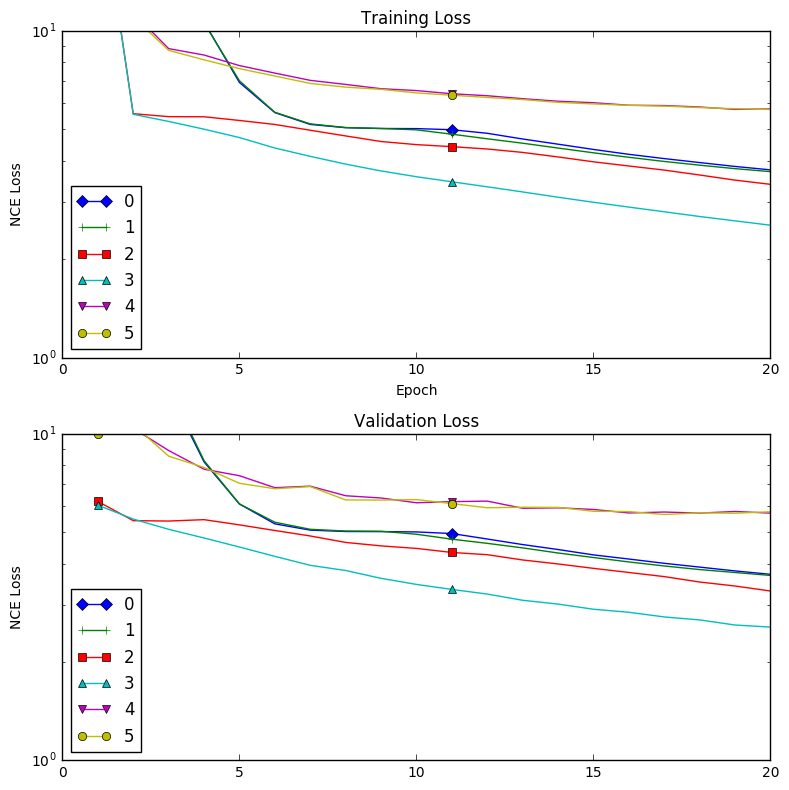

In [5]:
plot_results(results_list)